# CSE 601 Data Mining and Bioinformatics
# Project 2: Clustering Algorithms

# Part 2: Hierarchical Agglomerative Clustering
Description: This program conducts clustering algorithm on gene expressions datasets (cho.txt and iyer.txt) to find clusters of genes that exhibit similar expression profiles.

Submitted By:
    
Name: Karan Manchandia | 
UBIT: karanman | 
Person No.: 50290755
    
Name: Divya Srivastava | 
UBIT: divyasri | 
Person No.: 50290383

Name: Varsha Lakshman | 
UBIT: varshala | 
Person No.: 50288138 

In [1]:
#Importing Libraries

import sys
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as maplot
from sklearn.decomposition import PCA
from scipy.linalg import norm as scipynorm
import matplotlib.cm as mapcm

In [2]:
# Enter the data file name, open it and assign it to the variable data_file
while True:
    try:
        my_file = input("Enter the name of the gene expression data file:")
        data_file = open(my_file)
        
    # In case of a error the except block will be executed
    except:
        print("Error: Could not find file or read data")
        continue
        
    # This block will be executed after correct data file name is entered
    else:
        print("Correct data file found and imported\n")
        print("----------------------------------------------------------------------------------------\n")
        break
    
#set the numpy matrix to display maxsize
numpy.set_printoptions(threshold=sys.maxsize)

#set numpy matrix to display floating point numbers 
numpy.set_printoptions(suppress=True)

# Load the data from tab delimited text file
# genfromtxt function imports the text file into a numpy matrix 
# INPUT parameters: my_file and deliminator
data__file = numpy.genfromtxt(data_file, delimiter = "\t")

# We have removed the gene id and ground truth cluster column when importing data from the text file into a numpy matrix
impo_data = data__file[:,2:]

# Print given data file numpy matrix
print(f"The given data file in a numpy matrix is shown below: \n\n{impo_data}")


Enter the name of the gene expression data file:new_dataset_2.txt
Correct data file found and imported

----------------------------------------------------------------------------------------

The given data file in a numpy matrix is shown below: 

[[ 0.88845  0.96682  0.93679  0.81723  0.88242]
 [ 0.86257  0.85462  0.86419  0.84451  0.86159]
 [ 0.9402   0.91072  0.93074  0.93317  0.94034]
 [-0.57792 -1.008   -0.81377 -0.3012  -0.55201]
 [-1.1451  -0.90137 -1.0215  -1.2628  -1.1573 ]
 [-0.96824 -0.82282 -0.89646 -1.0309  -0.97505]]


In [3]:
# Converting numpy matrix to pandas data frame in order to remove columns with zero standard deviation

# Converting numpy matrix into pandas dataframe
temp_df = pandas.DataFrame(impo_data)
# Dropping columns with zero standard deviation
temp_df.drop(temp_df.std()[temp_df.std() == 0 ].index.values, axis=1)
# Converting pandas data frame again to numpy matrix
impo_data = temp_df.as_matrix()
norm_data = impo_data

# Assigning length of norm_data to a variable
norm_data_size1 = len(norm_data)

# Converting gene_expr_ids to a numpy array
gene_expr_id = numpy.array(list(range(len(norm_data))))

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
# Taking input from the user for the total number of clusters
while True:
    try:
        no_of_clusters = int(input("Enter the total number of clusters:\n"))
        
    # In case of a error(such as entering a string insterd of number) the except block will be executed
    except:
        print("Error: Please enter a number(int)")
        continue
        
    # This block will be executed after correct data file name is entered
    else:
        print("\nTotal number of clusters is set to be {}".format(no_of_clusters))
        break
    

Enter the total number of clusters:
2

Total number of clusters is set to be 2


In [5]:
# Calculating the distance matrix

# calculating the number of row in the distance matrix.
norm_dist_size = int((len(norm_data) ** 2 - len(norm_data)) / 2)
#print(norm_dist_size)

# Creating an empty numpy matrix for distance matrix(norm_dist)
norm_dist = numpy.empty((norm_dist_size, 3))
print("The size of the distance matrix is: {}\n\n".format(norm_dist.shape))

# Populating the norm_dist(distance matrix)with the distance between normalized data points
temp1 = 0
temp2 = 0
while temp2<(len(norm_data)-1):
    temp3 = temp2 + 1
    while temp3 < len(norm_data):
        temp4 = (scipynorm(norm_data[temp2]-norm_data[temp3]))
        norm_dist[temp1] = [temp2, temp3, temp4]
        temp1 = temp1 + 1
        temp3 = temp3 + 1
    temp2 = temp2 + 1
    
# Printing the distance matrix
print("The distance matrix is shown below:\n\n{}".format(norm_dist))
    

The size of the distance matrix is: (15, 3)


The distance matrix is shown below:

[[0.         1.         0.14038327]
 [0.         2.         0.15052802]
 [0.         3.         3.52464047]
 [0.         4.         4.4662447 ]
 [0.         5.         4.10812536]
 [1.         2.         0.16632705]
 [1.         3.         3.41625977]
 [1.         4.         4.38026697]
 [1.         5.         4.01944869]
 [2.         3.         3.57495003]
 [2.         4.         4.5459614 ]
 [2.         5.         4.18476449]
 [3.         4.         1.29122632]
 [3.         5.         0.95126437]
 [4.         5.         0.37426894]]


In [6]:
#Hierarchical Aggolomerative Clustering Algorithm:

# Sorting the distance numpy array(norm_dist) by distance
norm_dist_sorted = norm_dist[numpy.argsort(norm_dist[:, 2])]

# Creating a pandas datafram from the distance matrix
norm_dist_df= pandas.DataFrame({'Point1':[item[0] for item in norm_dist_sorted],'Point2':[item[1] for item in norm_dist_sorted], 'Distance':[item[2] for item in norm_dist_sorted]})
#print(norm_dist_df)

# Performing HAC Algorithm on gene_expr_id numpy matrix, using the distance pandas dataframe(norm_dist_df) 
row_norm_dist_df = 0
while row_norm_dist_df < len(norm_dist_df):
    if (norm_data_size1 != no_of_clusters):
        temp11 = norm_dist_df.loc[row_norm_dist_df]['Point1']
        temp12 = norm_dist_df.loc[row_norm_dist_df]['Point2']
        if temp11 != temp12:
            temp13 = int(norm_dist_df.loc[row_norm_dist_df]['Point1'])
            temp14 = norm_dist_df.loc[row_norm_dist_df]['Point2']
            gene_expr_id[temp13] = temp13
            gene_expr_id[gene_expr_id == temp14] = temp13
            norm_dist_df = norm_dist_df.replace((temp14),(temp13))
            norm_data_size1 -= 1
    row_norm_dist_df += 1


In [7]:
# Taking unique values from gene_expr_id numpy matrix
temp22 = list(set(gene_expr_id))
temp20 = sorted(temp22)

# Creating an empty dictionery
temp21 = {}

# Poplutating the dictionery with cluster id and no. of objects(gene expressions) in the cluster
for item in temp20:
    no_items = 0
    for item1 in gene_expr_id:
        if item1 == item:
            no_items += 1
            temp21[item] = no_items

# Finding the gene ids in each cluster
# Defining an empty dictionery
gene_id_cluster = {}
# Populating gene_id_cluster dictionery
for item2 in gene_expr_id:
        if item2 == 0:
            continue
        gene_id_cluster[item2] = numpy.asarray(numpy.where(gene_expr_id == item2))+1
            
# Printing the cluster id with the count of gene expression objects in the cluster
print("Results of HAC clustering algorithm are shown below:")
for k,v in temp21.items():
    print("For cluster with cluster id {} the total number of gene objects in the cluster are {}.".format(k,v))

Results of HAC clustering algorithm are shown below:
For cluster with cluster id 0 the total number of gene objects in the cluster are 3.
For cluster with cluster id 3 the total number of gene objects in the cluster are 3.


In [8]:
# For each cluster printing the cluster id and the gene ids in that cluster
print("The gene ids that are in each cluster are shown below:\n")
for cluster_id, geneid in gene_id_cluster.items():
    print (f"The cluster with cluster id {cluster_id} has the following gene objects represented by these gene ids:\n{geneid}")
    print("-------------------------------------------------------------------------------------------------------------------")

The gene ids that are in each cluster are shown below:

The cluster with cluster id 3 has the following gene objects represented by these gene ids:
[[4 5 6]]
-------------------------------------------------------------------------------------------------------------------


In [9]:
# PCA : Data Preprocessing for PCA

# Creating a empty list and putting cluster indexes in it
index_clstr = []
for item3 in gene_expr_id:
    index_clstr.append(temp22.index(item3))

# Creating an empty list and putting unique cluster indexes in it
index_clstr_unq = []
for item5 in index_clstr:
    if item5 not in index_clstr_unq:
        index_clstr_unq.append(item5)
index_clstr_unq.sort()


In [10]:
# PCA : Principle Component Analysis
# We are using PCA package from sklearn library to implement this
# Calculating reduced dimentions:new factors
pca_set = PCA(n_components=2, svd_solver='full')
pca_set.fit(norm_data)
new_factors = pca_set.transform(norm_data)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Principle Component 2')

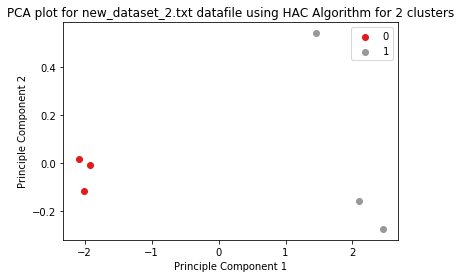

In [11]:
# Generating variable number of colors
if (my_file == "iyer.txt"):
    var_col = [maplot.cm.jet(float(i) / max(index_clstr_unq)) for i in index_clstr_unq]
else: 
    var_col = mapcm.Set1(numpy.linspace (0,1,len(index_clstr_unq)))

# Plotting the final dataframe with disease names
plot1 = maplot.figure()
plot11 = plot1.add_subplot(111)

# Taking first and second columns from new_factors()
first_col = new_factors[:,0]
second_col = new_factors[:,1]

# Calculating the coordinates for the plot
for x, y in enumerate(index_clstr_unq):
    temp_a = []
    temp_b = []
    
    # Populating temp_a list
    for (m,n) in enumerate(first_col):
        if index_clstr[m] == y:
            temp_a.append(n)
            
    # Populating temp_b list
    for (m,n) in enumerate(second_col):
        if index_clstr[m] == y:
            temp_b.append(n)
    
    # Converting labels to string
    l = str(int(y))
    
    # Plotting the graph
    plot11.scatter(temp_a,temp_b, c=var_col[x], label=l)
    
#giving the location of the legend as "best"
#This would place the legend at the location in the graph that would overcover minimum data points
plot11.legend(loc='best')

# Giving X axis label
plot11.set_xlabel('Principle Component 1')

# Giving the title for the graph
plot11.set_title(f"PCA plot for {my_file} datafile using HAC Algorithm for {no_of_clusters} clusters")

# Giving Y axis label
plot11.set_ylabel('Principle Component 2')

# Saving the scatter plot as a PDF file
# maplot.savefig(f"PCA plot for {my_file} datafile using HAC Algorithm for {no_of_clusters} clusters")

In [12]:
# jaccard Cofficient and Rand Index

# Taking the ground truth values from data file
ground_truth = data__file[:, 1]

# Defining empty ground truth and clustering matrix
clustering_matrix = numpy.empty((len(norm_data),len(norm_data)))
ground_truth_matrix = numpy.empty((len(norm_data),len(norm_data)))

# Populating the ground truth and clustering matrix
p = 0        
while p <(clustering_matrix.shape[0]):
    clustering_matrix[p][p] = 1
    ground_truth_matrix[p][p] = 1
    q = p+1
    while q < clustering_matrix.shape[1]:
        if gene_expr_id[p] != -1 and gene_expr_id[q] != -1 and gene_expr_id[p] == gene_expr_id[q]:
            clustering_matrix[p][q] = 1
            clustering_matrix[q][p] = 1
        if ground_truth[p] != -1 and ground_truth[q] != -1 and ground_truth[p] == ground_truth[q]:
            ground_truth_matrix[p][q] = 1
            ground_truth_matrix[q][p] = 1
        q += 1
    p += 1

# initializing variables
# f11 = no. of pairs of objects having same class and same clusters
# f00 = no. of pairs of objects having different class and different clusters
# f01 = no. of pairs of objects having different class and same clusters
# f10 = no. of pairs of objects having same class and different clusters
f11=0
f00=0
f10=0
f01=0

# Calculating the values of same_class, same_cluster, different_class, different cluster table(in theory)
for i in range(clustering_matrix.shape[0]):
    for j in range(ground_truth_matrix.shape[1]):
        if (clustering_matrix[i,j] == 1 and ground_truth_matrix[i,j] == 1):
            f11 += 1
        elif (clustering_matrix[i,j] == 0 and ground_truth_matrix[i,j] == 0):
            f00 += 1
        elif (clustering_matrix[i,j] == 1 and ground_truth_matrix[i,j] == 0):
            f10 += 1
        elif (clustering_matrix[i,j] == 0 and ground_truth_matrix[i,j] == 1):
            f01 += 1

# Calculating and printing the Jaccard Cofficient and Rand Index
print(f"The Jaccard Cofficient for HAC Algorithm for {no_of_clusters} clusters is: {f11/(f11+f10+f01)}")
print(f"The Rand Index for HAC Algorithm for {no_of_clusters} clusters is: {(f11+f00)/(f11+f10+f01+f00)}")


The Jaccard Cofficient for HAC Algorithm for 2 clusters is: 1.0
The Rand Index for HAC Algorithm for 2 clusters is: 1.0


In [13]:
# The Code completes here